<div align="center">
  <h1>Non-Dissonant incremental updates</h1>
  <h2>Analysis of Experiment 2.1. on GPT2-SMALL</h2>
</div>


<div align="center">
<img src="../figs/Non-dissonant-experiment.png" alt="Overview of our experimental pipeline" width="1000" height="auto" style="background-color: white;">
</div>

<div align="center">
<h3> Learning rates:</h3>

| Knowledge | Dataset name  | Strategy | LR |
|:---------:|:------------:|:--------:|:---:|
| *Old Facts* | Dataset A | Standard Finetuning | `0.001` (lr2) |
| *New Facts* | Dataset B | Full & LoRA Finetuning | `0.0005` (lr1) |
| *New Facts* | Dataset B | Targeted Strategies | `0.001` (lr2) |

</div>

Results below were obtained by running:

```bash
accelerate launch --config_file configs/gpu_x.yaml experiments_scripts/exp_2_1_with_LoRa.py --config configs/gpt2-small_experiment2_1.yml
```

### 1. Comparison of Old knowledge vs New Knowledge (as a function of Neurons)

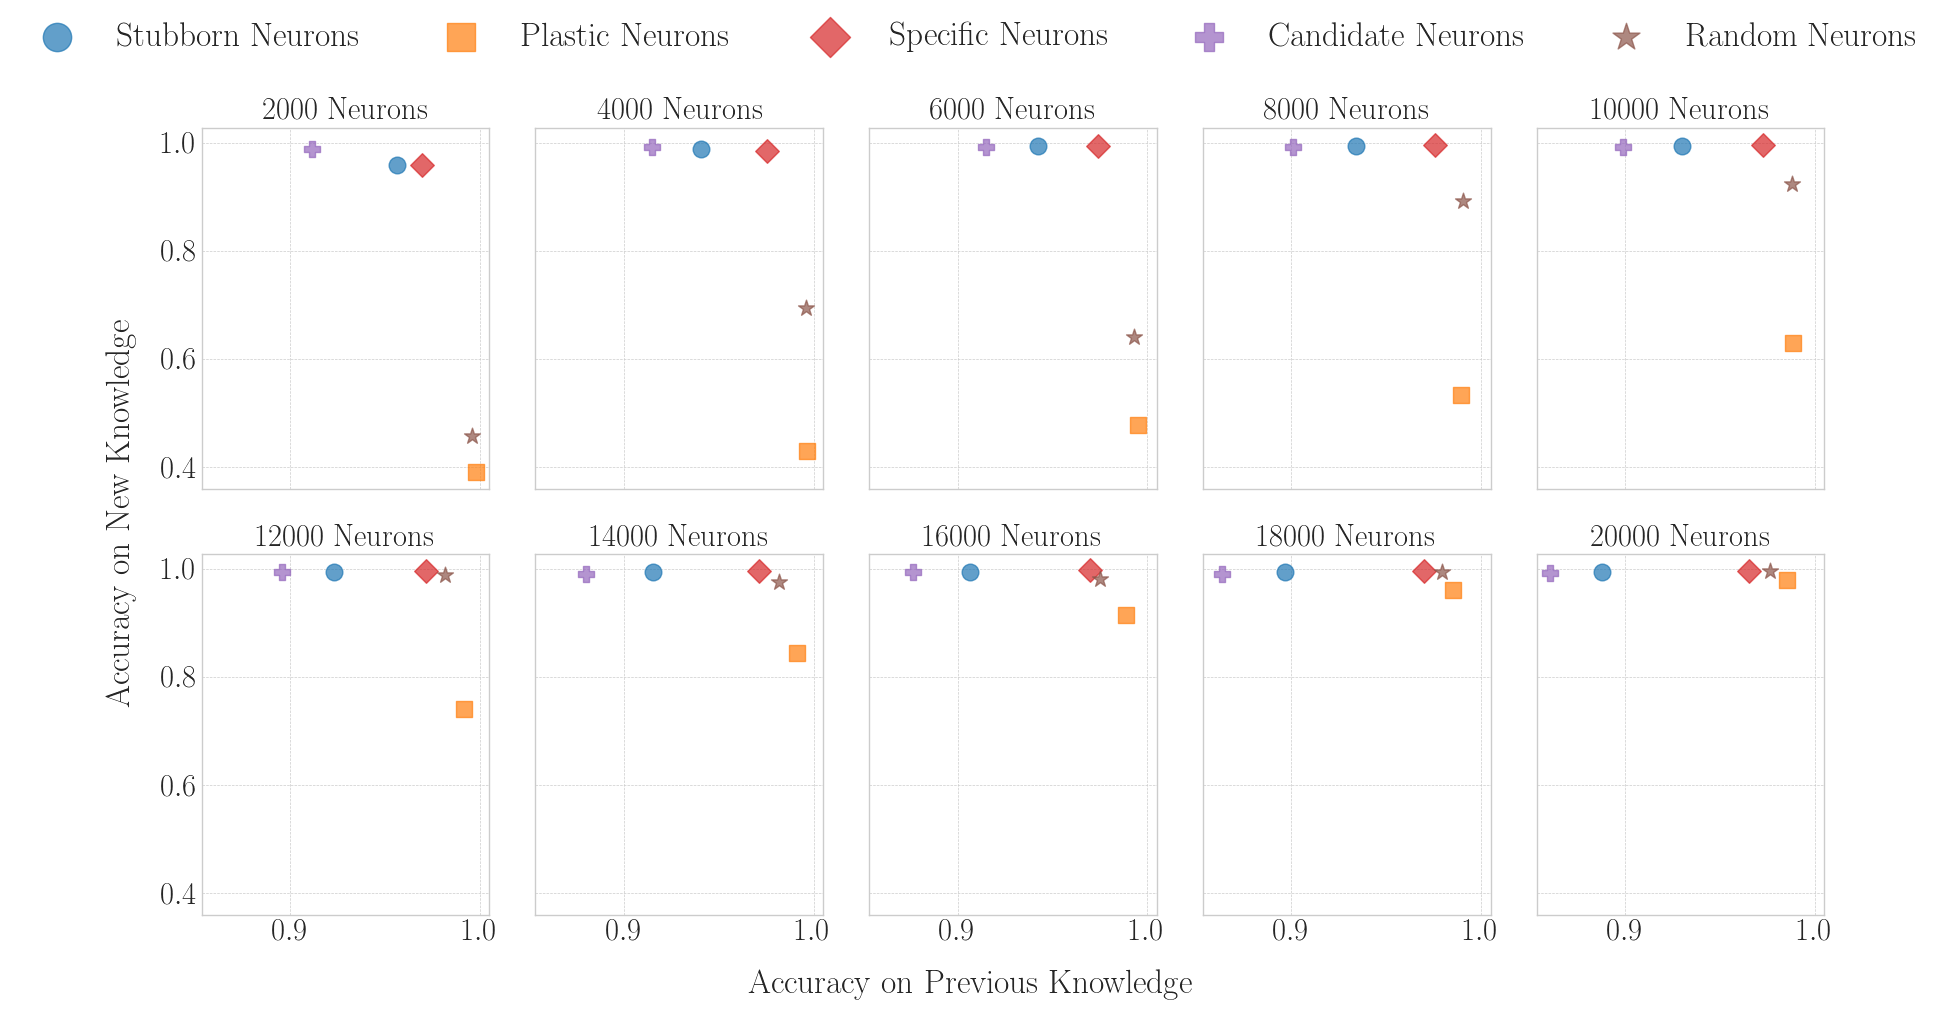

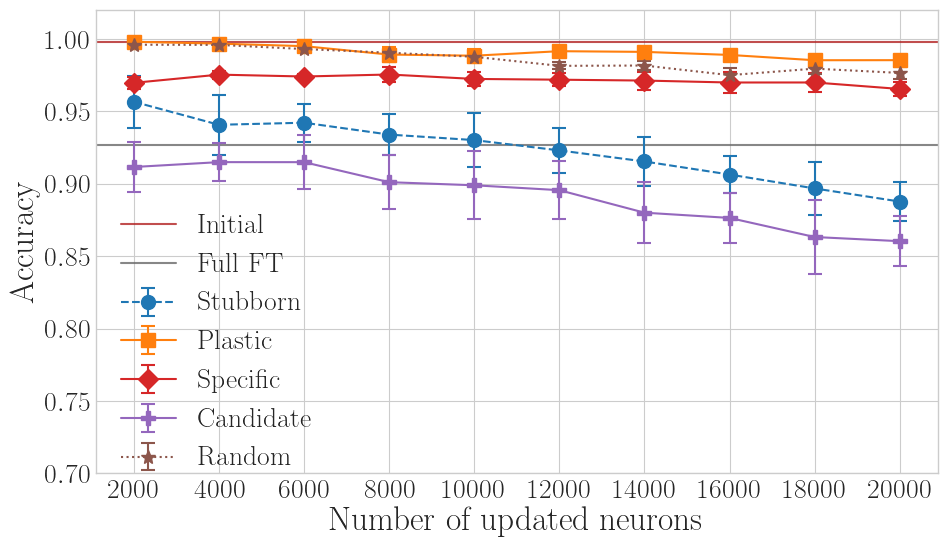

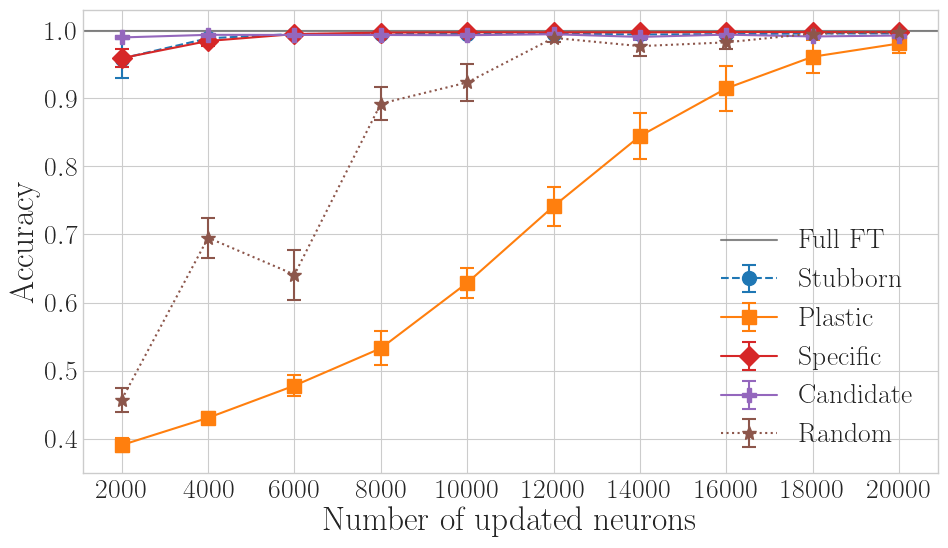

In [1]:
%load_ext autoreload
%autoreload 2

from retained_plots import plot_old_new_knowledge_all_loRA, plot_old_new_knowledge_all,plot_pareto_mosaic

experiment_name = 'experiment_2_1_paper_version_LoRA'
filepath = '../results/experiment_2_1'
filename = 'experiment_2_1_paper_version_LoRA.json'

plot_pareto_mosaic(filepath, filename, experiment_name=experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'])
plot_old_new_knowledge_all(filepath, filename, experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'],loc_old='lower left',bbox_old=(0,-0.05),loc_new='lower right', bbox_new=(1,0), y_lim_old_1=0.7, y_lim_old_2=1.02)

### 2. Results with LoRa

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


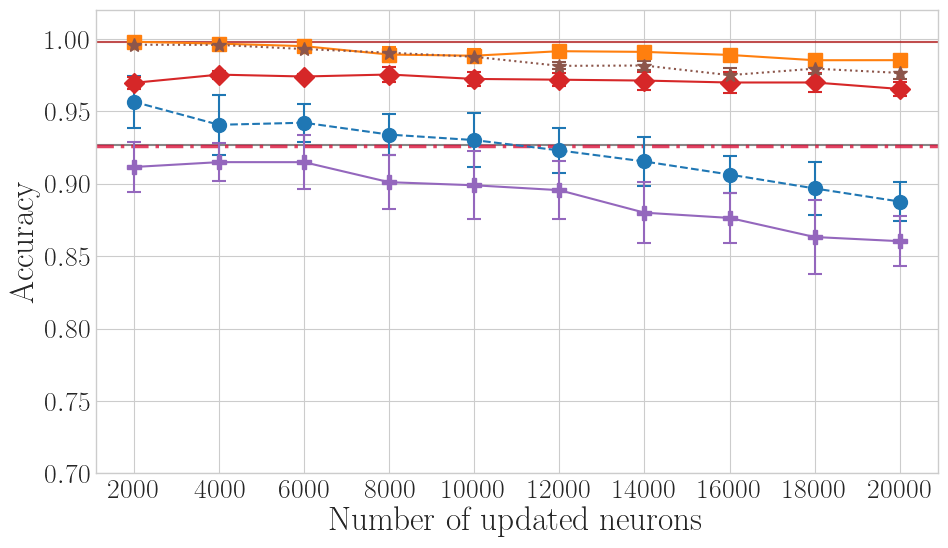

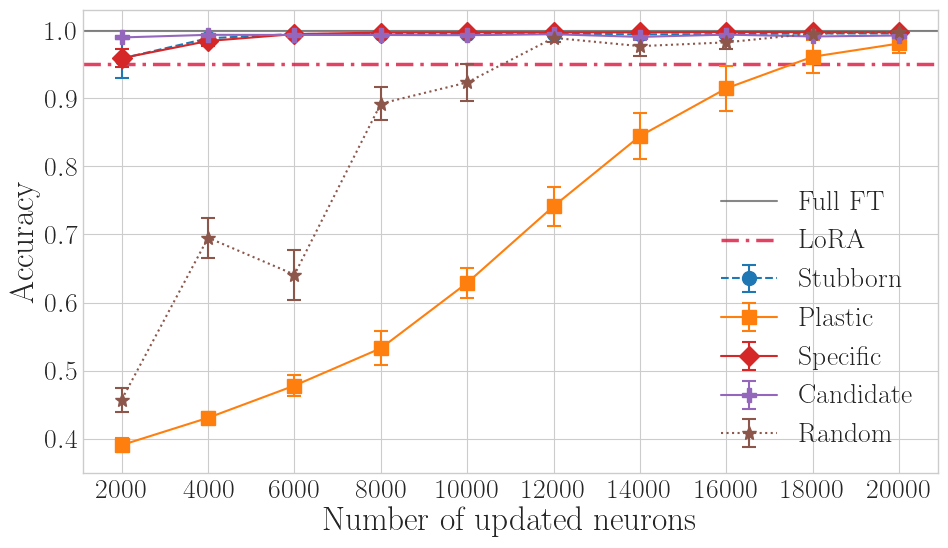

In [2]:
%load_ext autoreload
%autoreload 2

from retained_plots import plot_old_new_knowledge_all_loRA

experiment_name = 'experiment_2_1_paper_version_LoRA'
filepath = '../results/experiment_2_1'
filename = 'experiment_2_1_paper_version_LoRA.json'

plot_old_new_knowledge_all_loRA(filepath, filename, experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'],loc_old='lower left',bbox_old=(0,-0.05),loc_new='lower right', bbox_new=(1,0), y_lim_old_1=0.7, y_lim_old_2=1.02)